## Numpy course project (Python for Data Science traning)

### Description:

This project aims to address the various existing tools in the Numpy library with a view to their better use in data science.


#### What is the NUMPY?

Numpy is a Python kibrary that assosts in various calculations applied in Data Science

To use this library you must install it using the command:\
!pip install numpy

We will also use the matplotlib library in this project, so let's download:\
!pip instsall matplotlib

Once downloaded, wer must import it into the code

In [237]:
# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt

We need to read the file that contains the data and organize the data in order to be used

In [238]:
# Reading the datset on github
url = 'https://raw.githubusercontent.com/IngridDayaneFerreira/Projetos_PythonDataScience_Alura/main/Numpy/apples_ts.csv'

In [239]:
# Saving the dataset in a variable
apples_ts = np.loadtxt(url,delimiter=',',usecols=np.arange(1,88,1))

In [240]:
# Number of dimensions, size and number of rows and colmns in the array
apples_ts.ndim, apples_ts.size, apples_ts.shape

(2, 522, (6, 87))

In [241]:
# Transposing the array
apples_ts_transposto = apples_ts.T

In [242]:
# Creating a array with the dates
datas = apples_ts_transposto[:,0]

In [243]:
# Creating a array with the prices
precos = apples_ts_transposto[:,1:6]

In [244]:
# To plot the graph with the dates in the dataset it gives an error, so we calculate the number of months to do the plotting
datas = np.arange(1,88,1)

Finally, using the matplotlib library, we can plot the graphs relates to the data and continue the project

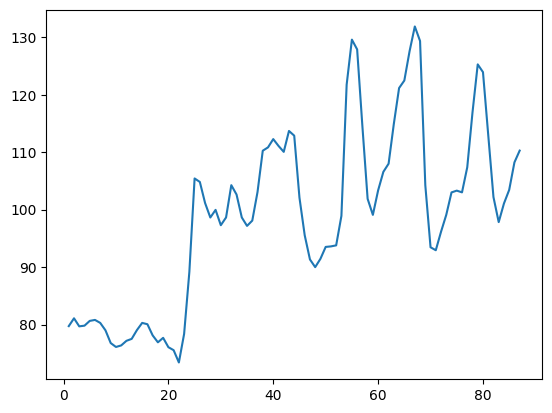

In [245]:
# Plotting the graph
plt.plot(datas,precos[:,0])

In [246]:
# Saving the prices for each city
Moscow = precos[:,0]
Kaliningrad = precos[:,1]
Petersburg = precos[:,2]
Krasnodar = precos[:,3]
Ekaterinburg = precos[:,4]

In [247]:
# Checking the size of Moscow prices array
Moscow.shape

(87,)

In [248]:
# Dividing Moscow price data into months per year
Moscow_ano1 = Moscow[0:12] 
Moscow_ano2 = Moscow[12:24]
Moscow_ano3 = Moscow[24:36]
Moscow_ano4 = Moscow[36:48]

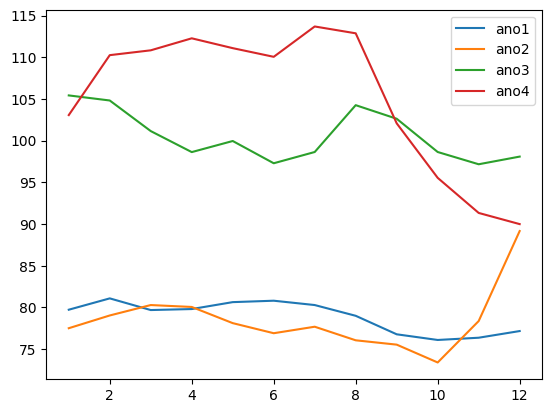

In [249]:
# Plotting four years
plt.plot(np.arange(1,13,1),Moscow_ano1)
plt.plot(np.arange(1,13,1),Moscow_ano2)
plt.plot(np.arange(1,13,1),Moscow_ano3)
plt.plot(np.arange(1,13,1),Moscow_ano4)

plt.legend(['ano1','ano2','ano3','ano4'])

In [250]:
# Checking if one array is equal to another
np.array_equal(Moscow_ano3,Moscow_ano4)

False

In [251]:
# Checkin if the difference between two arrays is less than the parameter
np.allclose(Moscow_ano3,Moscow_ano4,10)

True

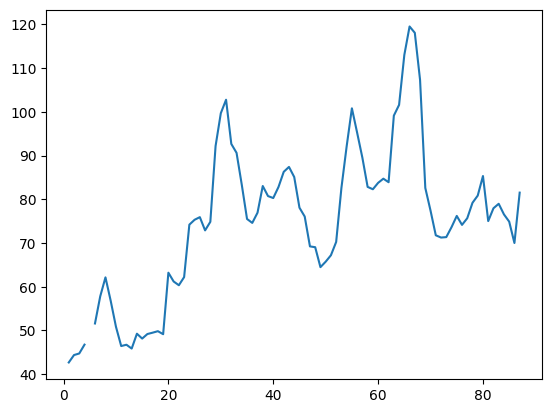

In [252]:
# Ploting the Kaliningrad prices
plt.plot(datas,Kaliningrad)

In [253]:
# Checking the amount of NaN
sum(np.isnan(Kaliningrad))

1

In [254]:
# Correcting the values NaN
# Interpolating
# Average
(Kaliningrad[3] + Kaliningrad[5])/2

49.17

In [255]:
# Average with Numpy
Kaliningrad[4] = np.mean([Kaliningrad[3],Kaliningrad[5]])

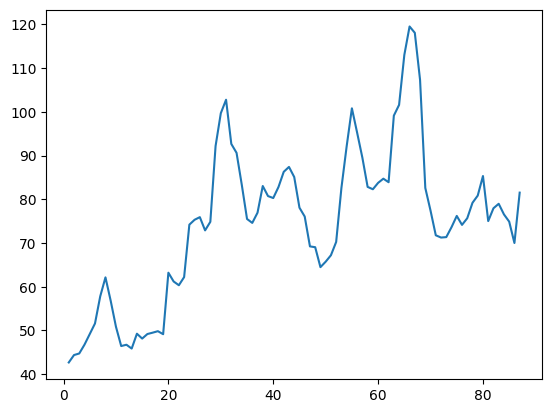

In [256]:
#Ploting the correct Kaliningrad prices
plt.plot(datas,Kaliningrad)

In [257]:
np.mean(Moscow)

98.79781609195402

In [258]:
np.mean(Kaliningrad)

74.5506896551724

## Linear Regression Process

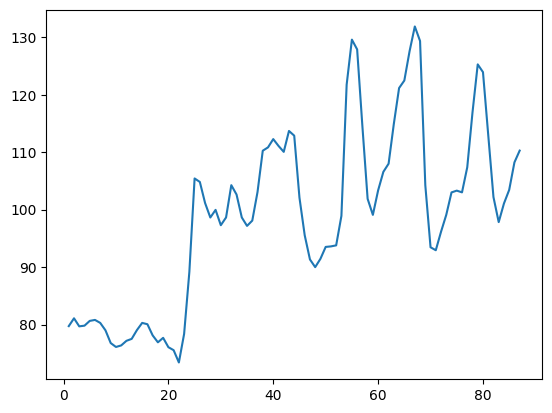

In [259]:
plt.plot(datas,Moscow)

In [260]:
x = datas

In [261]:
y = 2*x + 80

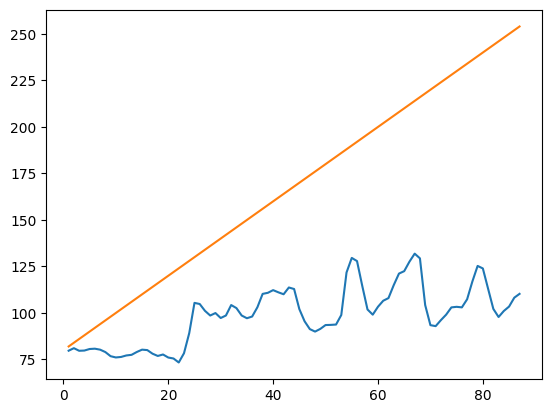

In [262]:
plt.plot(datas,Moscow)
plt.plot(x,y)

É possível observar que a reta ficou muito divergente aos dados.

In [263]:
# Potentiation
# Square
np.sqrt(np.sum(np.power(Moscow - y,2)))

749.2329171225728

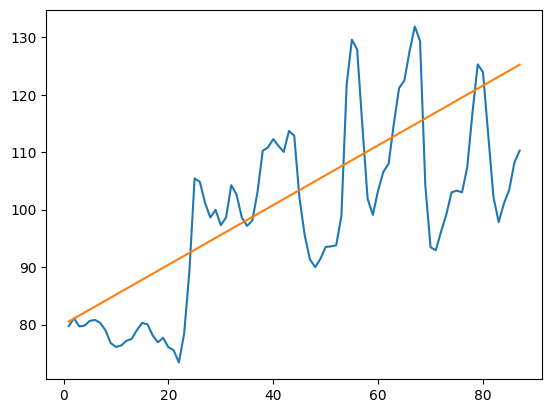

In [264]:
# Correcting divergence on the chart
y = 0.52*x + 80
plt.plot(datas,Moscow)
plt.plot(x,y)

In [265]:
# Calculate the norm
np.sqrt(np.sum(np.power(Moscow-y,2)))

110.48504740461489

In [266]:
# Calculatre the norm
np.linalg.norm(Moscow-y)

110.48504740461489

#### How to calculate the angular coefficient

a = Angular coefficient
n = number of elements
Y = Moscow
X = dates

The coefficient can be calculate like this:


$$ \hat{a} = \frac{n*Sum(X_i * Y_i) - Sum(X_i) * Sum(Y_i)}{n * Sum(X_i^2) - (Sum(X_i)^2)}

In [267]:
Y = Moscow
X = datas
n = np.size(Moscow)

In [268]:
X**2

array([   1,    4,    9,   16,   25,   36,   49,   64,   81,  100,  121,
        144,  169,  196,  225,  256,  289,  324,  361,  400,  441,  484,
        529,  576,  625,  676,  729,  784,  841,  900,  961, 1024, 1089,
       1156, 1225, 1296, 1369, 1444, 1521, 1600, 1681, 1764, 1849, 1936,
       2025, 2116, 2209, 2304, 2401, 2500, 2601, 2704, 2809, 2916, 3025,
       3136, 3249, 3364, 3481, 3600, 3721, 3844, 3969, 4096, 4225, 4356,
       4489, 4624, 4761, 4900, 5041, 5184, 5329, 5476, 5625, 5776, 5929,
       6084, 6241, 6400, 6561, 6724, 6889, 7056, 7225, 7396, 7569])

In [269]:
(X**2).shape

(87,)

In [270]:
a = (n*np.sum(X*Y) - np.sum(x)*np.sum(Y)) / (n*np.sum(X**2) - (np.sum(X)**2))

#### How to calculate the linear coefficient

The coefficient can be calculate like this:

$$ \hat{b} = Average(Y_i) - \hat{a} * Average(X_i)

In [271]:
b = np.mean(Y) - a*np.mean(X)

In [272]:
y = a*X+b

In [273]:
np.linalg.norm(Moscow-y)

101.7969539992751

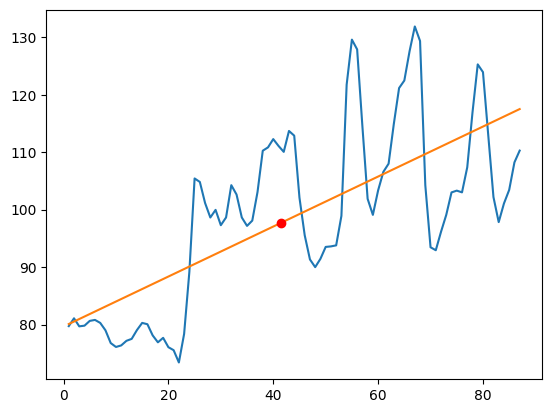

In [274]:
plt.plot(datas,Moscow)
plt.plot(x,y)
plt.plot(41.5,41.5*a+b,'or')

#### Estimating future values

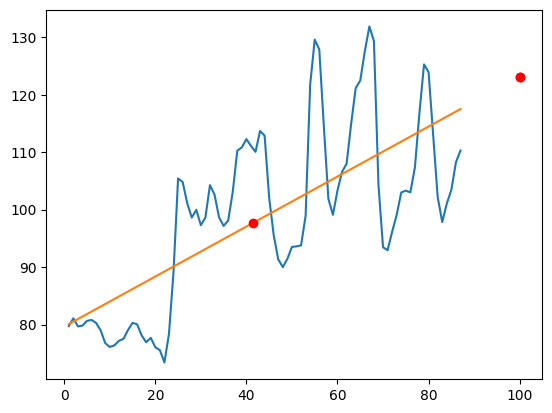

In [275]:
plt.plot(datas,Moscow)
plt.plot(x,y)
plt.plot(41.5,41.5*a+b,'or')
plt.plot(100,100*a+b,'or')
plt.plot(100,100*a+b,'or')

##### Returning to angular and linear coefficientes by trial and error generating randon numbers

In [276]:
np.random.randint(low=40,high=100,size=100)

array([73, 62, 55, 50, 46, 71, 74, 53, 43, 60, 96, 63, 80, 81, 49, 92, 57,
       85, 79, 80, 86, 83, 66, 90, 45, 85, 62, 40, 69, 40, 80, 46, 62, 48,
       88, 98, 72, 74, 56, 48, 86, 60, 67, 55, 92, 81, 46, 90, 86, 54, 85,
       56, 75, 49, 97, 66, 48, 40, 59, 64, 77, 98, 79, 76, 46, 91, 45, 41,
       78, 87, 49, 48, 62, 77, 52, 58, 71, 75, 94, 61, 41, 54, 87, 55, 91,
       74, 55, 55, 42, 59, 44, 72, 96, 50, 75, 65, 96, 42, 97, 77])

In [277]:
np.random.uniform(low=0.10,high=0.90,size=100)

array([0.50526253, 0.79521896, 0.46529549, 0.41293497, 0.17972692,
       0.88552523, 0.73644394, 0.41920252, 0.52723623, 0.36425085,
       0.42336076, 0.42807811, 0.84030249, 0.21474537, 0.46672158,
       0.48703429, 0.43120259, 0.86772886, 0.16410341, 0.50118155,
       0.50557062, 0.49111588, 0.48924173, 0.13922738, 0.41701676,
       0.32367412, 0.30548245, 0.48039921, 0.26209519, 0.37999892,
       0.21265266, 0.35348583, 0.12380623, 0.36672015, 0.79706366,
       0.29100676, 0.59596685, 0.44684564, 0.38580712, 0.62259487,
       0.51286654, 0.60688153, 0.67698242, 0.13156419, 0.68587835,
       0.55080278, 0.75148557, 0.17046907, 0.18472326, 0.44551122,
       0.28776664, 0.30409508, 0.69851555, 0.68262761, 0.57887405,
       0.49689962, 0.86501094, 0.29844098, 0.101916  , 0.58252192,
       0.53555706, 0.43055509, 0.27520987, 0.21003749, 0.8128793 ,
       0.24616976, 0.89177508, 0.40751801, 0.74168017, 0.8465858 ,
       0.29181976, 0.1516007 , 0.13282571, 0.72250763, 0.37564

In [278]:
angulars_coeff = np.random.uniform(low=0.10,high=0.90,size=100)

In [279]:
norma = np.array([])
for i in range(100):
    norma = np.append(norma,np.linalg.norm(Moscow-(angulars_coeff[i]*X+b)))

In [280]:
norma

array([179.70981539, 144.97328856, 152.01092628, 103.75262711,
       236.51130718, 113.62391685, 123.09622658, 161.06213809,
       103.77518428, 108.95543179, 138.53643795, 150.01543972,
       101.84197757, 137.4690268 , 180.41988633, 180.76315459,
       121.91239733, 119.81662424, 120.65996716, 142.1676828 ,
       102.28327306, 165.10732731, 171.57323789, 183.76845845,
       153.40291714, 126.42107777, 111.79800648, 102.43950526,
       104.43490318, 172.05944999, 137.13829412, 201.5034925 ,
       102.55065109, 151.16130323, 151.36051006, 163.48324967,
       104.19552279, 186.29034996, 211.21986239, 127.7172681 ,
       141.99928978, 111.98445907, 123.22416569, 102.12038765,
       143.08789463, 115.29192287, 186.59396887, 106.71491272,
       207.10211227, 101.79764878, 102.41700927, 185.75995575,
       102.7380737 , 162.74107033, 110.18843888, 176.11843456,
       196.76586607, 101.94174905, 237.54670801, 148.39548698,
       203.45635314, 122.32336247, 181.21989929, 132.62

In [281]:
angulars_coeff[1]

0.216765768143234

##### Reproducibility of random numbers

In [282]:
np.random.seed(16)
np.random.uniform(low=0.10,high=0.90,size=100)

array([0.27863286, 0.51853067, 0.54056117, 0.13648156, 0.38858307,
       0.27846475, 0.65098093, 0.23098514, 0.15625989, 0.85280869,
       0.5509451 , 0.16239387, 0.67811241, 0.22676174, 0.30022505,
       0.3347898 , 0.65728857, 0.47141127, 0.27204971, 0.45746101,
       0.196703  , 0.83414961, 0.55315706, 0.47761545, 0.35165314,
       0.13457258, 0.70195593, 0.53461524, 0.71375234, 0.73235901,
       0.1577771 , 0.62777267, 0.14263947, 0.64801956, 0.45468077,
       0.47439692, 0.62884747, 0.65197331, 0.31066359, 0.10918315,
       0.71703556, 0.75291386, 0.21171328, 0.5624054 , 0.37253942,
       0.28577239, 0.258915  , 0.31719262, 0.88148221, 0.27234318,
       0.38512593, 0.11471996, 0.59343222, 0.28432431, 0.69388139,
       0.56740017, 0.43608284, 0.66740227, 0.87763642, 0.74803129,
       0.44452414, 0.86618288, 0.13820648, 0.68622544, 0.64053316,
       0.52160413, 0.55358996, 0.6783562 , 0.64608268, 0.73625014,
       0.19027642, 0.25933011, 0.67705538, 0.41509386, 0.37134

In [283]:
np.random.seed(84)
angulars_coeff = np.random.uniform(low=0.10,high=0.90,size=100)
norma = np.array([])
for i in range(100):
    norma = np.append(norma,np.linalg.norm(Moscow-(angulars_coeff[i]*X+b)))

norma

array([173.90151233, 103.45241986, 121.75367289, 128.97173036,
       238.69504078, 149.16590195, 137.73123242, 118.54419212,
       101.79720981, 149.04689147, 112.80225228, 105.8049351 ,
       230.82444742, 111.69709582, 134.56525603, 110.93209631,
       204.12484401, 196.82117307, 221.88687726, 156.13691054,
       125.51272174, 136.46474504, 165.39506278, 240.68784732,
       104.52254473, 188.75637903, 131.2292927 , 128.94885341,
       234.70773582, 147.01799832, 113.7418054 , 116.94496221,
       109.58257043, 107.09546548, 145.00728041, 182.83818792,
       140.95017242, 106.12371866, 107.0915778 , 132.45242448,
       144.8736358 , 143.54772697, 240.23793834, 113.74604121,
       116.01191029, 152.02977343, 174.72333708, 141.8068161 ,
       101.93467119, 103.01538109, 169.59787792, 128.13083711,
       105.06648948, 101.83421597, 102.53716362, 113.63850533,
       219.96993004, 117.37921502, 182.70217805, 146.69612581,
       178.64742004, 132.25425967, 109.74998636, 186.49

In [284]:
angulars_coeff

array([0.13683279, 0.39619385, 0.29385461, 0.602784  , 0.89208805,
       0.20447044, 0.23887133, 0.30665125, 0.43471917, 0.20481511,
       0.3323601 , 0.49624488, 0.87360345, 0.33791189, 0.62144155,
       0.52849032, 0.8096211 , 0.7916786 , 0.85242626, 0.18466651,
       0.59057786, 0.24287265, 0.15934165, 0.89674619, 0.38501918,
       0.77157959, 0.61045713, 0.2676991 , 0.88274155, 0.21072909,
       0.54257849, 0.3133875 , 0.34935345, 0.36479868, 0.21666475,
       0.75660734, 0.22889395, 0.4986747 , 0.36482516, 0.25587381,
       0.21706205, 0.64938079, 0.89569528, 0.32780566, 0.55295355,
       0.19624604, 0.13469036, 0.22628157, 0.44641143, 0.40177235,
       0.1481411 , 0.59986997, 0.49023732, 0.4293729 , 0.46122788,
       0.54208756, 0.84785549, 0.31153122, 0.11414346, 0.65873013,
       0.74587422, 0.61387426, 0.52200325, 0.76589084, 0.38088747,
       0.25165091, 0.11382762, 0.88457997, 0.74881915, 0.86863621,
       0.11018484, 0.32649201, 0.28185578, 0.10218576, 0.37916

##### Saving the results

In [285]:
# Transforming one-dimensional array into two dimensional array


In [286]:
dados = np.column_stack([norma,angulars_coeff])

In [287]:
dados.shape

(100, 2)

In [288]:
np.savetxt('dados.csv',dados,delimiter=',')